In [73]:
# File system manangement
import time, psutil, os

In [74]:
#!pip install psutil

In [75]:
# Data manipulation
import numpy as np
import pandas as pd

In [76]:
# Plotting and visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_theme()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [77]:
# NLP
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

from num2words import num2words

from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer

In [78]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [79]:
# Scipy
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix

In [80]:
# Train-test split and cross validation
from sklearn.model_selection import train_test_split, ParameterGrid

In [81]:
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier


In [82]:
# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Others
import json
#import gensim
from sklearn.decomposition import TruncatedSVD

In [83]:
# Recording the starting time, complemented with a stopping time check in the end to compute process runtime
start = time.time()

In [84]:
# Class representing the OS process and having memory_info() method to compute process memory usage
process = psutil.Process(os.getpid())

In [85]:
# Loading and customizing the data
df = pd.read_csv("train_data.txt", sep=":::",header=None, 
                 names=["id", "name","genre","Description"])

C:\Users\Hari Om\AppData\Local\Temp\ipykernel_4532\3583653236.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [86]:
type(df)

pandas.core.frame.DataFrame

In [87]:
print(pd.Series({"Memory usage": "{:.2f} MB".format(df.memory_usage().sum()/(1024*1024)), 
                 "Dataset shape": "{}".format(df.shape)}).to_string())

Memory usage        1.65 MB
Dataset shape    (54214, 4)


In [88]:
df=df.set_index('id')

In [89]:
df.head()

,name,genre,Description
id,,,
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [90]:
# Example description
df['Description'].iloc[0]

' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'

In [91]:
df['genre'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [92]:
# Missing values and duplicate observations
print(pd.Series({"Number of observations with missing values": len(df) - len(df.dropna()),
                 "Number of duplicate observations": df.duplicated().sum()}).to_string())

Number of observations with missing values    0
Number of duplicate observations              0


In [93]:
df.dropna(inplace = True) # Dropping observations with missing values
df.drop_duplicates(inplace = True) # Dropping duplicate observations
df.reset_index(drop = True, inplace = True) # Resetting index

In [94]:
df

,name,genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54209,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [95]:
data = df[['genre','Description']]

In [96]:
data

,genre,Description
0,drama,Listening in to a conversation between his do...
1,thriller,A brother and sister with a past incestuous r...
2,adult,As the bus empties the students for their fie...
3,drama,To help their unemployed father make ends mee...
4,drama,The film's title refers not only to the un-re...
...,...,...
54209,comedy,This short-lived NBC live sitcom centered on ...
54210,horror,The NEXT Generation of EXPLOITATION. The sist...
54211,documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,comedy,Walter and Vivian live in the country and hav...


## Visualizing content of 'Genre' colum of dataset

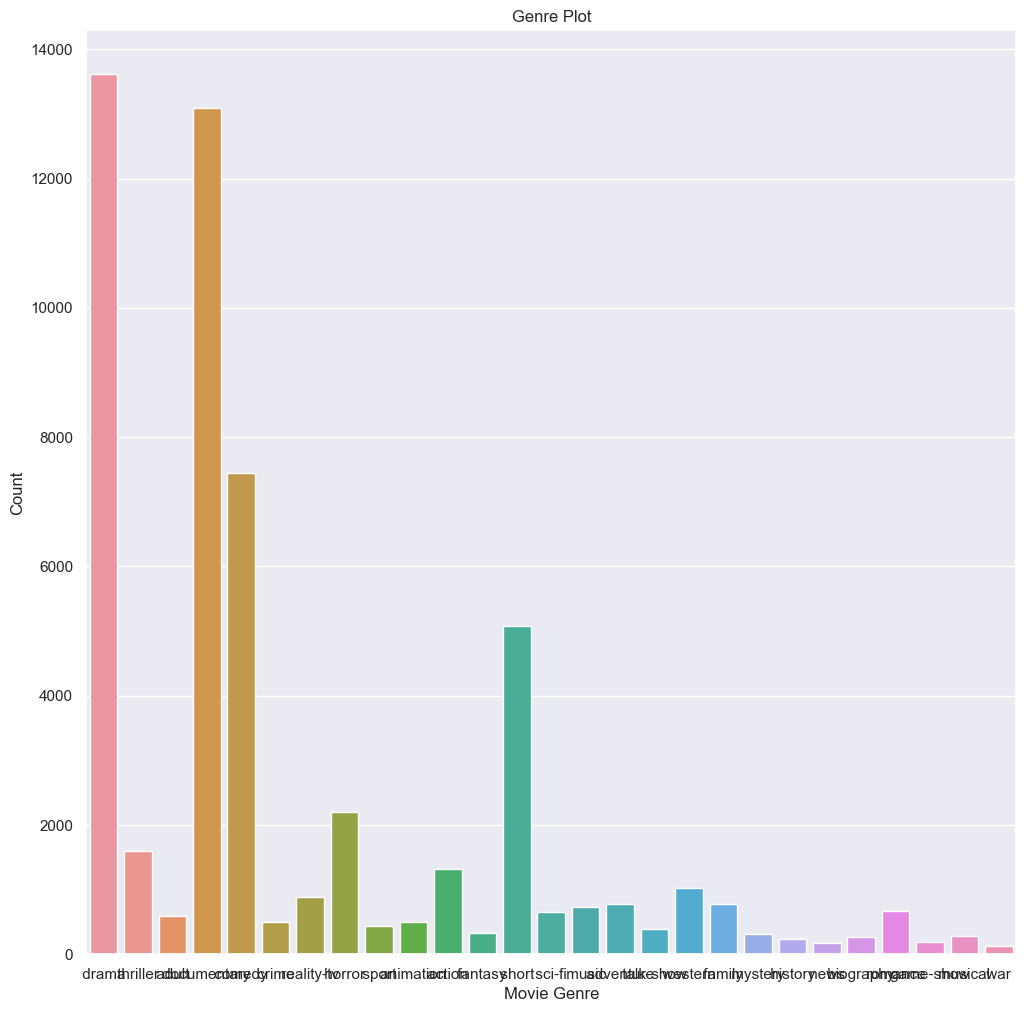

In [97]:
plt.figure(figsize=(12,12))
sns.countplot(x='genre',data=data)
plt.xlabel('Movie Genre')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

In [98]:
movie_genre = list(data['genre'].unique())
movie_genre.sort()
movie_genre

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [99]:
# Manual encoding of labels
label_dict = {' drama ':0, ' thriller ':1, ' adult ':2, ' documentary ':3, ' comedy ':4,
       ' crime ':5, ' reality-tv ':6, ' horror ':7, ' sport ':8, ' animation ':9,
       ' action ':10, ' fantasy ':11, ' short ':12, ' sci-fi ':13, 'music ':14,
       ' adventure ':15, ' talk-show ':16, 'western ':17, ' family ':18, 'mystery ':19,
       ' history ':20, ' news ':21, ' biography ':22, ' romance ':23, ' game-show ':24,
       ' musical ':25, ' war ':26}
data['genre'] = data['genre'].map(label_dict)

df.replace({'genre': label_dict}, inplace = True)

print(pd.Series({"Memory usage": "{:.2f} MB".format(df.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(df.shape)}).to_string())

Memory usage        1.24 MB
Dataset shape    (54214, 3)


C:\Users\Hari Om\AppData\Local\Temp\ipykernel_4532\3974125560.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
df.head()

,name,genre,Description
0,Oscar et la dame rose (2009),0,Listening in to a conversation between his do...
1,Cupid (1997),1,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",2,As the bus empties the students for their fie...
3,The Secret Sin (1915),0,To help their unemployed father make ends mee...
4,The Unrecovered (2007),0,The film's title refers not only to the un-re...


In [101]:
df.isna().any()

name           False
genre          False
Description    False
dtype: bool

In [103]:
df.drop('name',axis=1,inplace=True)

In [105]:
df

,genre,Description
0,0,Listening in to a conversation between his do...
1,1,A brother and sister with a past incestuous r...
2,2,As the bus empties the students for their fie...
3,0,To help their unemployed father make ends mee...
4,0,The film's title refers not only to the un-re...
...,...,...
54209,4,This short-lived NBC live sitcom centered on ...
54210,7,The NEXT Generation of EXPLOITATION. The sist...
54211,3,"Ze bestaan echt, is a stand-up comedy about g..."
54212,4,Walter and Vivian live in the country and hav...


## Cleaning the Text

In [118]:
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):
    if i%1000 == 0:
        print(f'processing...{i}')
    description = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['Description'][i]) # Cleaning special character from the dialog/script
    description = description.lower() #lowering the descriptiopn
    words = description.split() #tokenizing
    dialog_words = [word for word in words if word not in set(stopwords.words('english'))]
    words = [ps.stem(word) for word in dialog_words] #stemming the words
    description = ' '.join(words) # joining stemmed words
    corpus.append(description)

processing...0
processing...1000
processing...2000
processing...3000
processing...4000
processing...5000
processing...6000
processing...7000
processing...8000
processing...9000
processing...10000
processing...11000
processing...12000
processing...13000
processing...14000
processing...15000
processing...16000
processing...17000
processing...18000
processing...19000
processing...20000
processing...21000
processing...22000
processing...23000
processing...24000
processing...25000
processing...26000
processing...27000
processing...28000
processing...29000
processing...30000
processing...31000
processing...32000
processing...33000
processing...34000
processing...35000
processing...36000
processing...37000
processing...38000
processing...39000
processing...40000
processing...41000
processing...42000
processing...43000
processing...44000
processing...45000
processing...46000
processing...47000
processing...48000
processing...49000
processing...50000
processing...51000
processing...52000
proces

In [1]:
corpus[0:3]

NameError: name 'corpus' is not defined

In [120]:
len(corpus)

54214

In [121]:
drama_words = []
for i in list(df[df['genre']==0].index):
    drama_words.append(corpus[i])
    
action_words = []
for i in list(df[df['genre']==10].index):
    action_words.append(corpus[i])
    
horror_words = []
for i in list(df[df['genre']==7].index):
    horror_words.append(corpus[i])

drama = ' '
action = ' '
horror = ' '

for i in range(0,3):
    drama += drama_words[1]
    action += action_words[i]
    horror += horror_words[i]

## Creating wordcloud for DRAMA genre

In [123]:
from wordcloud import WordCloud

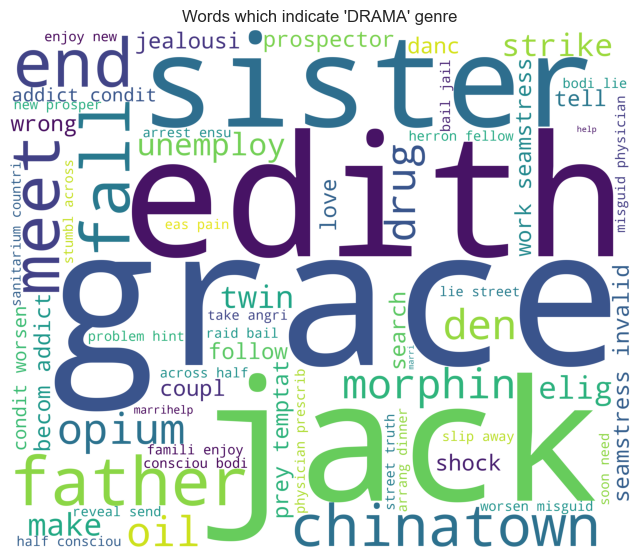

In [124]:
wordcloud1 = WordCloud(background_color = 'white', width = 3000, height = 2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre")
plt.show()

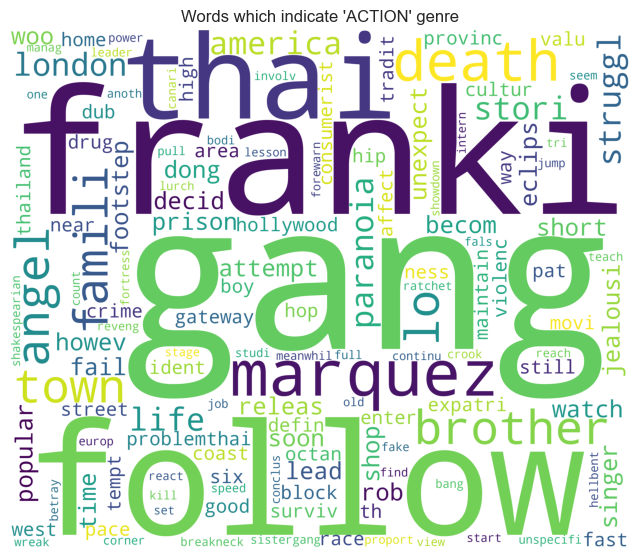

In [125]:
wordcloud2 = WordCloud(background_color = 'white', width = 3000, height = 2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre")
plt.show()

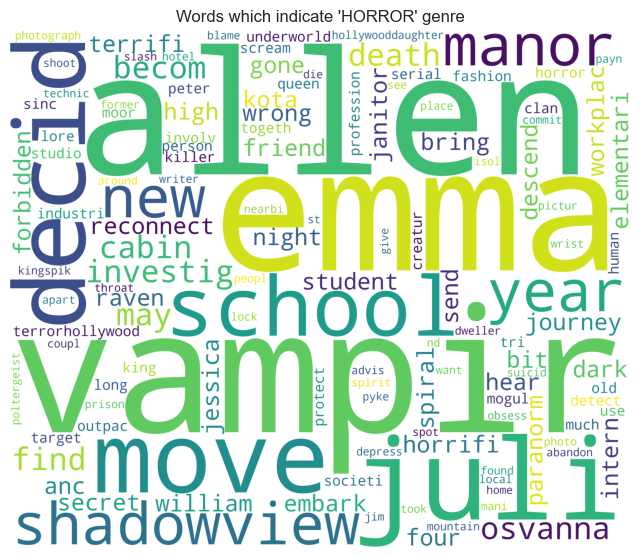

In [126]:
wordcloud3 = WordCloud(background_color = 'white', width = 3000, height = 2500).generate(horror)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'HORROR' genre")
plt.show()

## Creating the Bag of Words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
x = cv.fit_transform(corpus)

In [130]:
y = df['genre'].values

In [131]:
y

array([0, 1, 2, ..., 3, 4, 20], dtype=object)

## Model Building

In [134]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)
print('x_train: {},x_test_size: {}'.format(x_train.shape,x_test.shape))

x_train: (43371, 10000),x_test_size: (10843, 10000)


## Fitting Naive Bayes to the Training Set

In [136]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train,y_train)

ValueError: Unknown label type: (array([10, 3, 0, ..., 0, 0, 0], dtype=object),)

## Predicting the Test Set results

In [138]:
print(x_train)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [139]:
print(y_train)

[10 3 0 ... 0 0 0]


In [ ]:
print(x)

In [ ]:


stop = time.time()
print(pd.Series({"Process runtime": "{:.2f} seconds".format(float(stop - start)),
                 "Process memory usage": "{:.2f} MB".format(float(process.memory_info()[0]/(1024*1024)))}).to_string())